<a href="https://colab.research.google.com/github/shirinlatifi/pe-project/blob/master/OilVisco_keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

In [79]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [98]:
df = pd.read_excel('oil visco.xlsx')

In [ ]:
df

In [100]:
df['P'] = df['P'].fillna(df['P'].mean())

In [101]:
df['T'] = df['T'].fillna(df['T'].mean())

In [ ]:
# def fillnanP(col):
#     if pd.isnull(col):
#       return (df['P']!=np.NAN).mean()
#     else:
#       return col

In [ ]:
# def fillnanT(col):
#     if pd.isnull(col):
#       return (df['T']!=np.NAN).mean()
#     else:
#       return col

In [ ]:
# df['P'] = df['P'].apply(fillnanP)

In [ ]:
# df['T'] = df['T'].apply(fillnanT)

In [102]:
df.dropna(inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 541
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       495 non-null    float64
 1   P       495 non-null    float64
 2   Visco   495 non-null    float64
dtypes: float64(3)
memory usage: 15.5 KB


In [104]:
df.corr()

,T,P,Visco
T,1.000000,0.020013,-0.091632
P,0.020013,1.000000,-0.005034
Visco,-0.091632,-0.005034,1.000000


In [105]:
df.corr()['Visco']

T       -0.091632
P       -0.005034
Visco    1.000000
Name: Visco, dtype: float64

In [ ]:
sns.scatterplot(data=df, x='P', y='Visco', alpha=0.3)

In [ ]:
sns.scatterplot(data=df, x='T', y='Visco')

In [ ]:
sns.scatterplot(data=df, x='T', y='P')

In [ ]:
sns.pairplot(df)

#train test split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('Visco', axis=1), df['Visco'], test_size=0.1, random_state=100)

In [122]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train =  scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train =  scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test =  scaler.fit_transform(np.array(y_test).reshape(-1,1))


In [123]:
y_train.max()

0.9999999999999999

In [124]:
y_test.max()

1.0

In [114]:
X_train.max()

0.9999999999999999

In [115]:
X_train.min()

0.0

In [116]:
X_test.max()

0.9999999999999999

In [117]:
X_test.min()

0.0

# keras modeling

In [128]:
import scipy as sc

In [129]:
import tensorflow as tf

In [130]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
# help(Sequential)

# creat first hidden layer

In [132]:
model = Sequential([
    Dense(units=16, input_shape=(2,), activation='relu'),
    # Dropout(0.2), # Adding dropout regularization
    Dense(units=32, activation='relu'),
    # Dropout(0.2),
    Dense(units=2, activation='softmax'),
     Dense(units=1)
])

In [133]:
model

In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                48        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


#Getting Model Ready To Fit

In [135]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['accuracy'])

#Fitting The Model

In [136]:
model.fit(x=X_train,
          y=y_train,
          batch_size=300,
          validation_split=0.1,
          epochs=1000,
          #shuffle=True,
          verbose=2)

Epoch 1/1000
2/2 - 1s - loss: 0.6837 - accuracy: 0.0025 - val_loss: 0.6721 - val_accuracy: 0.0000e+00 - 1s/epoch - 593ms/step
Epoch 2/1000
2/2 - 0s - loss: 0.6716 - accuracy: 0.0025 - val_loss: 0.6600 - val_accuracy: 0.0000e+00 - 58ms/epoch - 29ms/step
Epoch 3/1000
2/2 - 0s - loss: 0.6597 - accuracy: 0.0025 - val_loss: 0.6480 - val_accuracy: 0.0000e+00 - 38ms/epoch - 19ms/step
Epoch 4/1000
2/2 - 0s - loss: 0.6480 - accuracy: 0.0025 - val_loss: 0.6363 - val_accuracy: 0.0000e+00 - 55ms/epoch - 28ms/step
Epoch 5/1000
2/2 - 0s - loss: 0.6366 - accuracy: 0.0025 - val_loss: 0.6248 - val_accuracy: 0.0000e+00 - 55ms/epoch - 27ms/step
Epoch 6/1000
2/2 - 0s - loss: 0.6254 - accuracy: 0.0025 - val_loss: 0.6137 - val_accuracy: 0.0000e+00 - 45ms/epoch - 22ms/step
Epoch 7/1000
2/2 - 0s - loss: 0.6145 - accuracy: 0.0025 - val_loss: 0.6029 - val_accuracy: 0.0000e+00 - 36ms/epoch - 18ms/step
Epoch 8/1000
2/2 - 0s - loss: 0.6039 - accuracy: 0.0025 - val_loss: 0.5923 - val_accuracy: 0.0000e+00 - 36ms/epo

<Axes: >

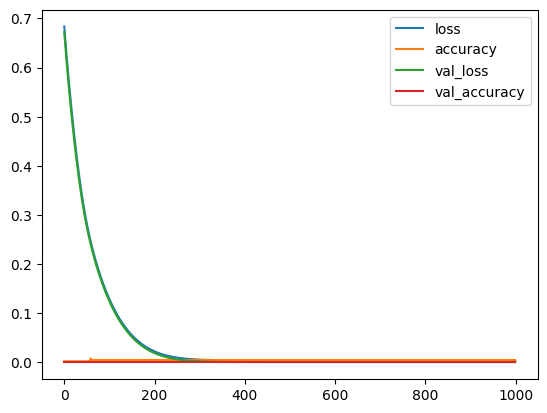

In [138]:
pd.DataFrame(model.history.history).plot()

# predict

In [139]:
predictions = model.predict(x=X_test, batch_size=100, verbose=2)

1/1 - 0s - 69ms/epoch - 69ms/step


In [140]:
predictions

array([[0.17615944],
       [0.00158629],
       [0.00756744],
       [0.00158441],
       [0.00169688],
       [0.00159648],
       [0.00156227],
       [0.004388  ],
       [0.00756744],
       [0.00157171],
       [0.00156391],
       [0.00164354],
       [0.0016304 ],
       [0.00889784],
       [0.0016152 ],
       [0.00156972],
       [0.00169688],
       [0.00158766],
       [0.00157171],
       [0.00756744],
       [0.00161219],
       [0.00178051],
       [0.00259075],
       [0.00156957],
       [0.00162289],
       [0.00156459],
       [0.00756744],
       [0.004388  ],
       [0.00756744],
       [0.00161222],
       [0.00168025],
       [0.00161216],
       [0.00161836],
       [0.00558171],
       [0.00156423],
       [0.00756744],
       [0.00335616],
       [0.00218219],
       [0.0037578 ],
       [0.00176144],
       [0.00167599],
       [0.00158378],
       [0.00158516],
       [0.00156513],
       [0.00558171],
       [0.00756744],
       [0.00854021],
       [0.006

In [141]:
predictions.shape

(50, 1)

In [142]:
y_test.shape

(50, 1)

#evaluate

In [143]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0636 - accuracy: 0.0200


[0.06362602859735489, 0.019999999552965164]

In [145]:
import numpy as np
from sklearn.metrics import mean_absolute_error , mean_squared_error
mean_squared_error(y_test, predictions)

0.06362602681207205

In [146]:
mean_absolute_error(y_test, predictions)

0.17164866961862585

In [147]:
#  rmse = np.sqrt(mean_squared_error(y_test.values, predictions))
mean_squared_error(y_test, predictions, squared =False)

0.25224200049173423

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.round(), predictions.round(), normalize=False)

47